In [1]:
#Preliminaries 
#Start by importing these Python modules 
import numpy as np 
import pandas as pd 
from pandas import DataFrame, Series 
import matplotlib.pyplot as plt

/var/folders/kg/xq7xr8t15l555m9hcznhw4140000gq/T/ipykernel_5652/706623701.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


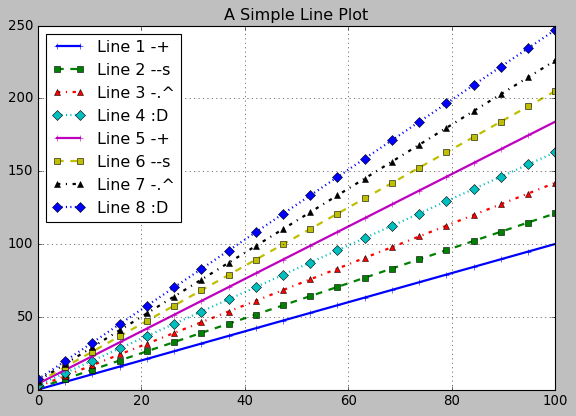

In [6]:
# Build a multi-line plot from raw data in matplotlib
# A multi-line plot with markers and line-styles
# --- select a style 
plt.style.use('classic') 
# --- get the Figure and Axes all at once 
fig, ax = plt.subplots(figsize=(8,6)) 
# --- plot some lines 
N = 8 # the number of lines we will plot 
styles = ['-', '--', '-.', ':'] 
b=('+','s','^','D')
markers = list(b) 
x = np.linspace(0, 100, 20) 
for i in range(N): # add line-by-line 
 y = x + x/5*i + i 
 s = styles[i % len(styles)] 
 m = markers[i % len(markers)] 
 ax.plot(x, y, 
 label='Line '+str(i+1)+' '+s+m, 
 marker=m, linewidth=2, linestyle=s) 
# --- add grid, legend, title and save 
ax.grid(True) 
ax.legend(loc='best', prop={'size':'large'}) 
ax.set_title('A Simple Line Plot') 
fig.tight_layout(pad=3) 
fig.show()

In [20]:
#fig.savefig('filename.png', dpi=125) 
#plt.close('all')

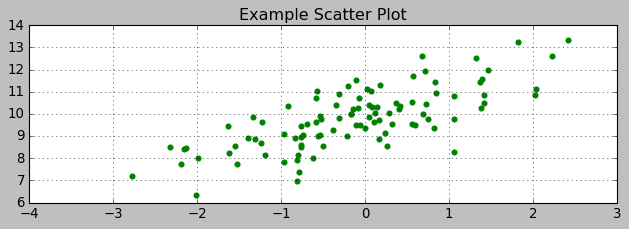

In [25]:
#A simple scatter plot 
x = np.random.randn(100) 
y = x + np.random.randn(100) + 10 
plt.style.use('classic') 
fig, ax = plt.subplots(figsize=(8, 3)) 
ax.scatter(x, y, alpha=1, color='green') 
ax.set_title('Example Scatter Plot') 
ax.grid(True) 
fig.tight_layout(pad=1) 
fig.savefig('filename1.png', dpi=125)


In [26]:
#Add a regression line (using statsmodels) 
import statsmodels.api as sm 
x = sm.add_constant(x) # intercept 
# Model: y ~ x + c 
model = sm.OLS(y, x) 
fitted = model.fit() 
x_pred = np.linspace(x.min(), x.max(), 50) 
x_pred2 = sm.add_constant(x_pred) 
y_pred = fitted.predict(x_pred2) 
ax.plot(x_pred, y_pred, '-', 
 color='darkorchid', linewidth=2) 
#fig.savefig('filename2.png', dpi=125)
fig.show()

/var/folders/kg/xq7xr8t15l555m9hcznhw4140000gq/T/ipykernel_5652/1477139117.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


/var/folders/kg/xq7xr8t15l555m9hcznhw4140000gq/T/ipykernel_5652/4235497985.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


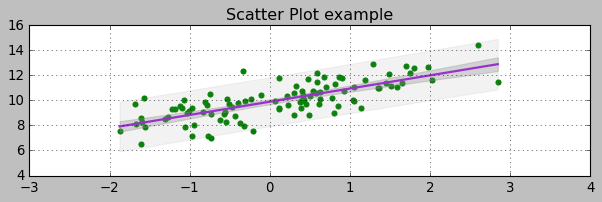

In [28]:
#A simple scatter plot 
x = np.random.randn(100) 
y = x + np.random.randn(100) + 10 
plt.style.use('classic') 
fig, ax = plt.subplots(figsize=(8, 3)) 
ax.scatter(x, y, alpha=1, color='green') 
ax.set_title('Scatter Plot example') 
ax.grid(True) 
fig.tight_layout(pad=2) 
#fig.savefig('filename1.png', dpi=125)
#Add a regression line (using statsmodels) 
import statsmodels.api as sm 
x = sm.add_constant(x) # intercept 
# Model: y ~ x + c 
model = sm.OLS(y, x) 
fitted = model.fit() 
x_pred = np.linspace(x.min(), x.max(), 50) 
x_pred2 = sm.add_constant(x_pred) 
y_pred = fitted.predict(x_pred2) 
ax.plot(x_pred, y_pred, '-', 
 color='darkorchid', linewidth=2) 
#fig.savefig('filename2.png', dpi=125)
#Add confidence bands for the regression line 
y_hat = fitted.predict(x) 
y_err = y - y_hat 
mean_x = x.T[1].mean() 
n = len(x) 
dof = n - fitted.df_model - 1 
from scipy import stats 
t = stats.t.ppf(1-0.025, df=dof) # 2-tail 
s_err = np.sum(np.power(y_err, 2)) 
conf = t * np.sqrt((s_err/(n-2))*(1.0/n + 
 (np.power((x_pred-mean_x),2) / 
 ((np.sum(np.power(x_pred,2))) - 
 n*(np.power(mean_x,2)))))) 
upper = y_pred + abs(conf) 
lower = y_pred - abs(conf) 
ax.fill_between(x_pred, lower, upper, 
 color='#888888', alpha=0.3) 
fig.savefig('filename3.png', dpi=125)
5.	#Add a prediction interval for the regression line 
from statsmodels.sandbox.regression.predstd import wls_prediction_std 
sdev, lower, upper = wls_prediction_std(fitted, exog=x_pred2, alpha=0.05) 
ax.fill_between(x_pred, lower, upper, color='#888888', alpha=0.1) 
fig.savefig('filename4.png', dpi=125) 
#plt.close('all')
#Note: The confidence interval relates to the location of the regression line. The predication interval relates to the location of data points around the regression line.
fig.show()


In [31]:
#Add confidence bands for the regression line 
y_hat = fitted.predict(x) 
y_err = y - y_hat 
mean_x = x.T[1].mean() 
n = len(x) 
dof = n - fitted.df_model - 1 
from scipy import stats 
t = stats.t.ppf(1-0.025, df=dof) # 2-tail 
s_err = np.sum(np.power(y_err, 2)) 
conf = t * np.sqrt((s_err/(n-2))*(1.0/n + 
 (np.power((x_pred-mean_x),2) / 
 ((np.sum(np.power(x_pred,2))) - 
 n*(np.power(mean_x,2)))))) 
upper = y_pred + abs(conf) 
lower = y_pred - abs(conf) 
ax.fill_between(x_pred, lower, upper, 
 color='#888888', alpha=0.3) 
fig.savefig('filename3.png', dpi=125)
5.	#Add a prediction interval for the regression line 
from statsmodels.sandbox.regression.predstd import wls_prediction_std 
sdev, lower, upper = wls_prediction_std(fitted, exog=x_pred2, alpha=0.05) 
ax.fill_between(x_pred, lower, upper, color='#888888', alpha=0.1) 
fig.savefig('filename4.png', dpi=125) 
fig.show()
#Note: The confidence interval relates to the location of the regression line. The predication interval relates to the location of data points around the regression line.



/var/folders/kg/xq7xr8t15l555m9hcznhw4140000gq/T/ipykernel_5652/2987813607.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


/var/folders/kg/xq7xr8t15l555m9hcznhw4140000gq/T/ipykernel_5652/2139290001.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


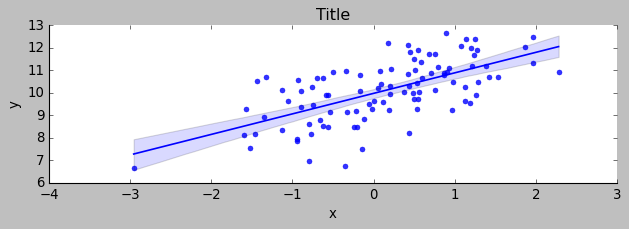

In [32]:
#Quick scatter and regression plots using Seaborn
#Use seaborn 
import seaborn as sns 
x = np.random.randn(100) 
y = x + np.random.randn(100) + 10 
df = pd.DataFrame([x, y], index=['x', 'y']).T 
g = sns.lmplot(x='x', y='y', data=df,fit_reg=True) 
ax = g.axes[0, 0] 
ax.set_title('Title') 
fig = ax.figure 
fig.set_size_inches(8, 3) 
fig.tight_layout(pad=1) 
fig.savefig("filename.png") 
#plt.close('all')
fig.show()


AttributeError: 'Figure' object has no attribute 'l'

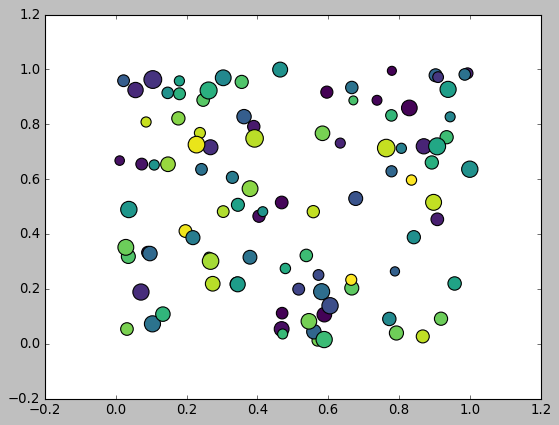

In [37]:
#Scatter plots – more options 
#Changing the marker size and colour 
# --- import a colour map 
import matplotlib.cm as cm 
# --- get some data 
N = 100 
x = np.random.rand(N) 
y = np.random.rand(N) 
size = ((np.random.rand(N) + 1) * 8) ** 2 
colour = np.random.rand(N) 
# --- plot 
plt.style.use('classic') 
fig, ax = plt.subplots(figsize=(8, 6)) 
l = ax.scatter(x, y, s=size, c=colour, cmap=cm.viridis) # choose a colormap 
# --- attach the colour bar 
clb = fig.l, 
orientation='horizontal', 
clb.ax.set_title('Colour bar title') 
# --- do the size legend by hand ... 
sz = [size.min(), size.mean(), size.max()] 
handles = [ax.scatter([],[],s=sz[i]) for i in range(len(sz))] 
labels = [str(int(round(x, 0))) for x in sz] 
fig.legend(handles=handles, labels=labels, 
 loc='upper right', scatterpoints=1, 
 title='Size') 
# --- grid, plot-limits, title and save 
ax.grid(True) 
ax.set_xlim((-0.05, 1.05)) 
ax.set_ylim((-0.05, 1.05)) 
ax.set_title('Dramatic Scatter Plot') 
fig.tight_layout(pad=1); 
fig.savefig('filename6.png', dpi=125) 
#plt.close('all')
#Note: there are many colormaps to choose from.


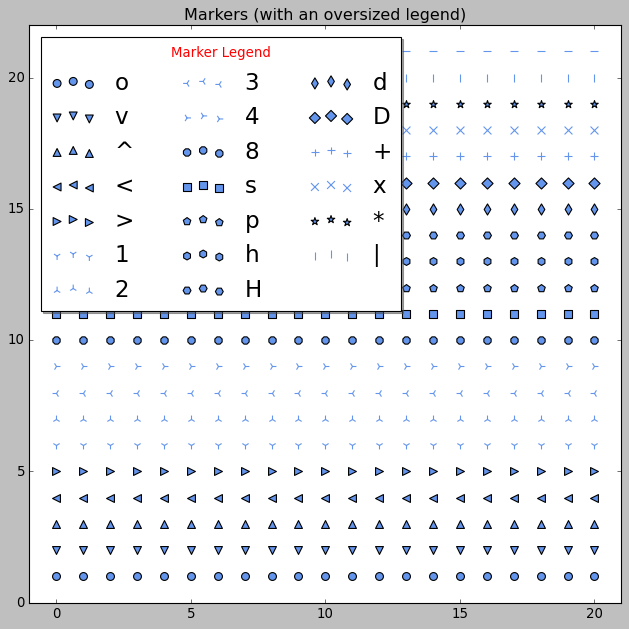

In [38]:
#Changing the marker symbol
# --- get the Figure and Axes classes 
plt.style.use('classic') 
fig, ax = plt.subplots(figsize=(8,8)) 
# --- add scatter plots 
markers = list('ov^<>12348sphHdD+x*|_') 
N = len(markers) 
for i, m in enumerate(markers): 
 x = np.arange(N) 
 y = np.repeat(i+1, N) 
 ax.scatter(x, y, marker=m, label=m, 
 s=50, c='cornflowerblue') 
# --- tidy up and save to file 
ax.set_xlim((-1,N)) 
ax.set_ylim((0,len(markers)+1)) 
ax.legend(loc='upper left', ncol=3, 
 prop={'size':'xx-large'}, 
 shadow=True, title='Marker Legend') 
ax.get_legend().get_title().set_color("red") 
ax.set_title('Markers ' + 
 '(with an oversized legend)') 
fig.tight_layout(pad=1); 
fig.savefig('filename.png', dpi=125) 
#plt.close('all')


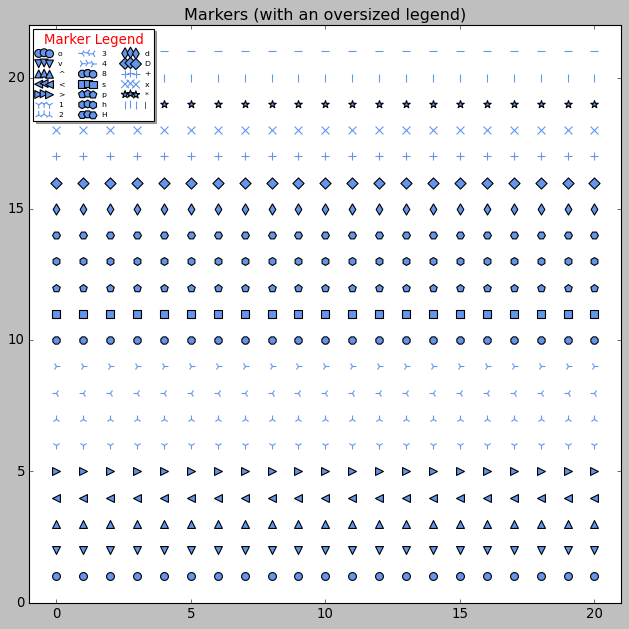

In [39]:
#Changing the marker symbol
# --- get the Figure and Axes classes 
plt.style.use('classic') 
fig, ax = plt.subplots(figsize=(8,8)) 
# --- add scatter plots 
markers = list('ov^<>12348sphHdD+x*|_') 
N = len(markers) 
for i, m in enumerate(markers): 
 x = np.arange(N) 
 y = np.repeat(i+1, N) 
 ax.scatter(x, y, marker=m, label=m, 
 s=50, c='cornflowerblue') 
# --- tidy up and save to file 
ax.set_xlim((-1,N)) 
ax.set_ylim((0,len(markers)+1)) 
ax.legend(loc='upper left', ncol=3, 
 prop={'size':'xx-small'}, 
 shadow=True, title='Marker Legend') 
ax.get_legend().get_title().set_color("red") 
ax.set_title('Markers ' + 
 '(with an oversized legend)') 
fig.tight_layout(pad=1); 
fig.savefig('filename.png', dpi=125) 
#plt.close('all')


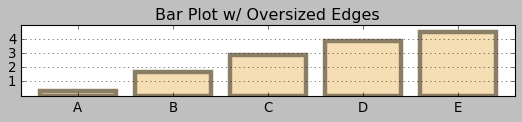

In [45]:
#Bar plots – using ax.bar() and ax.barh()
#A simple bar chart 
# --- get the data 
N = 5 
labels = list('ABCDEFGHIJKLM'[0:N]) 
data = np.array(range(N)) + np.random.rand(N) 
# --- plot the data 
plt.style.use('classic') 
fig, ax = plt.subplots(figsize=(8, 3)) 
width = 0.8 
tickLocations = np.arange(N) 
ax.bar(tickLocations, data, width, 
 color='wheat', edgecolor='#8B7E66', 
 linewidth=4.0, align='center') 
# --- pretty-up the plot 
ax.set_xticks(ticks= tickLocations) 
ax.set_xticklabels(labels) 
ax.set_xlim(min(tickLocations)-0.6, 
 max(tickLocations)+0.6) 
ax.set_yticks(range(N)[1:]) 
ax.set_ylim((0,N)) 
ax.yaxis.grid(True) 
# --- title and save 
ax.set_title("Bar Plot w/ Oversized Edges") 
#increasing the pad to see the difference
fig1 = fig.tight_layout(pad=5) 
fig.savefig('filename.png', dpi=125) 

#plt.close('all')



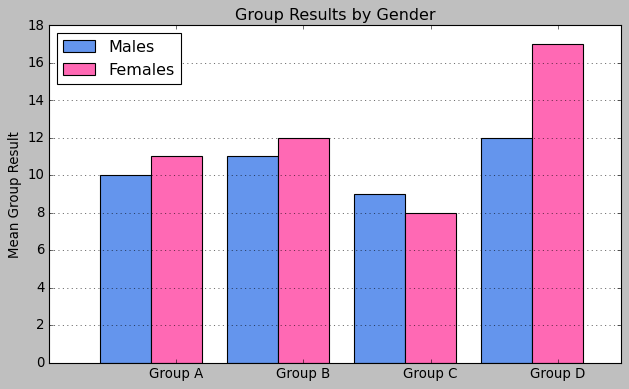

In [48]:
#Side by side bar chart 
# --- get the data
import numpy as np
import matplotlib.pyplot as plt 
before = np.array([10, 11, 9, 12]) 
after = np.array([11, 12, 8, 17]) 
labels=['Group '+x for x in list('ABCD')] 
# --- the plot – left then right 
fig, ax = plt.subplots(figsize=(8, 5)) 
width = 0.4 # bar width 
xlocs = np.arange(len(before)) 
ax.bar(xlocs-width, before, width, 
 color='cornflowerblue', label='Males') 
ax.bar(xlocs, after, width, 
 color='hotpink', label='Females') 
# --- labels, grids and title, then save 
ax.set_xticks(ticks=range(len(before))) 
ax.set_xticklabels(labels) 
ax.yaxis.grid(True) 
ax.legend(loc='best') 
ax.set_ylabel('Mean Group Result') 
ax.set_title('Group Results by Gender') 
fig.tight_layout(pad=1) 
fig.savefig('filename.png', dpi=125) 


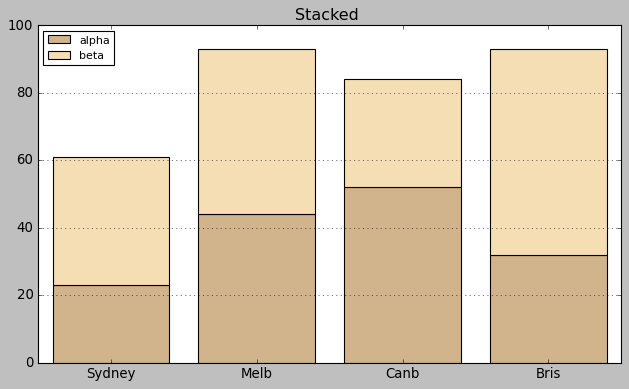

In [49]:
	#Stacked bar 
# --- get some data 
alphas = np.array( [23, 44, 52, 32] ) 
betas = np.array( [38, 49, 32, 61] ) 
labels = ['Sydney', 'Melb', 'Canb', 'Bris'] 
# --- the plot 
plt.style.use('classic') 
fig, ax = plt.subplots(figsize=(8, 5)) 
width = 0.8 
xlocations = np.array(range(len(alphas))) 
ax.bar(xlocations, alphas, width, 
 label='alpha', color='tan', 
 align='center') 
ax.bar(xlocations, betas, width, 
 label='beta', color='wheat', 
align='center', 
 bottom=alphas) 
# --- pretty-up and save 
ax.set_xticks(ticks=xlocations) 
ax.set_xticklabels(labels) 
ax.yaxis.grid(True) 
ax.legend(loc='best', prop={'size':'small'}) 
ax.set_title("Stacked ") 
fig.tight_layout(pad=1) 
fig.savefig('filename.png', dpi=125) 


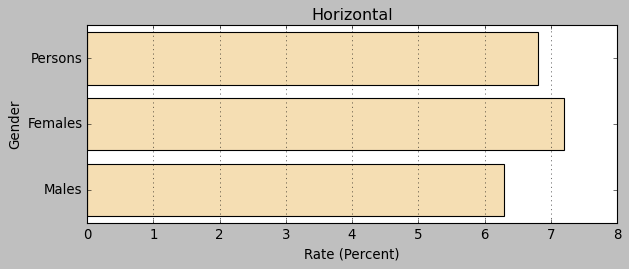

In [50]:
#Horizontal bar charts 
# --- the data 
labels = ['Males', 'Females', 'Persons'] 
data = [6.3, 7.2, 6.8] 
y = np.arange(len(data)) 
# --- plot 
width = 0.8 
fig, ax = plt.subplots(figsize=(8, 3.5)) 
ax.barh(y, data, width, color='wheat', 
 align='center') 
# --- tidy-up and save 
ax.set_yticks(y) 
ax.set_yticklabels(labels) 
ax.xaxis.grid(True) 
ax.set_ylabel('Gender'); 
ax.set_xlabel('Rate (Percent)') 
ax.set_title("Horizontal") 
fig.tight_layout(pad=1) 
fig.savefig('filename.png', dpi=125) 


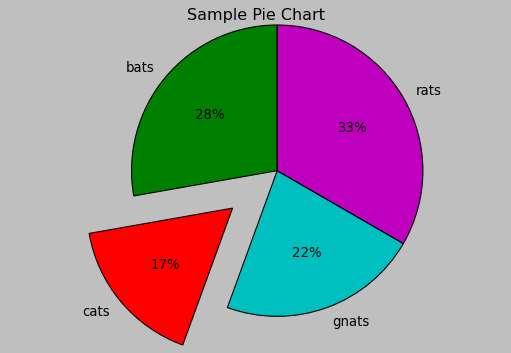

In [65]:
# Pie Chart – using ax.pie()---As nice as pie
 	## --- get some data 
data = np.array([5,3,4,6]) 
labels = ['bats', 'cats', 'gnats', 'rats'] 
explode = (0, 0.4, 0, 0) # explode cats 
#colrs=['khaki', 'goldenrod', 'tan', 'wheat'] 
# --- the plot – then tidy-up and save 
fig, ax = plt.subplots(figsize=(8, 5)) 
ax.pie(data, explode=explode, colors=('C1','C2','C3','C4'),
 labels=labels, autopct='%1.0f%%', 
 startangle=90) 
ax.axis('equal') # keep it a circle 
ax.set_title("Sample Pie Chart") 
fig.savefig('filename.png', dpi=125) 


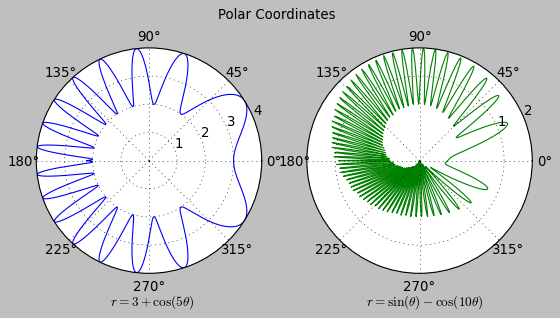

In [70]:
#a pair of coordinates locating the position of a point in a plane, the first being the length of the straight line ( r ) connecting the point to the origin, and the second the angle ( θ ) made by this line with a fixed line.
#Polar coordinates 
# --- theta 
theta = np.linspace(-np.pi, np.pi, 800) 
# --- get us a Figure 
fig = plt.figure(figsize=(8,4)) 
# --- left hand plot 
ax = fig.add_subplot(1,2,1, polar=True) 
r = 3 + np.sin(5*theta**2) 
ax.plot(theta, r) 
ax.set_yticks([1,2,3,4]) 
# --- right hand plot 
ax = fig.add_subplot(1,2,2, polar=True) 
r = (np.sin(theta)) - (np.cos(20*theta**2)) 
ax.plot(theta, r, color='green') 
ax.set_yticks([1,2]) 
# --- title, explanatory text and save 
fig.suptitle('Polar Coordinates') 
fig.text(x=0.24, y=0.05, 
 s=r'$r = 3 + \cos(5 \theta)$') 
fig.text(x=0.64, y=0.05, 
 s=r'$r = \sin(\theta) - \cos(10' + 
 r'\theta)$') 
fig.savefig('filename.png', dpi=125) 


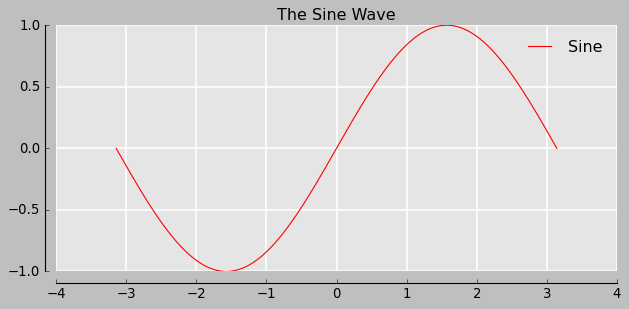

In [85]:
15.	#Plot spines 
#Hiding the top and right spines
# --- the data 
x = np.linspace(-np.pi, np.pi, 800) 
y = np.sin(x) 
# --- the plot 
fig, ax = plt.subplots(figsize=(8, 4)) 
ax.plot(x, y, label='Sine', color='red') 
# --- background and spines 
ax.set_facecolor('#e5e5e5') 
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none') 
ax.spines['left'].set_position( 
 ('outward',10)) 
ax.spines['bottom'].set_position( 
 ('outward',10)) 
ax.xaxis.set_ticks_position('bottom') 
ax.yaxis.set_ticks_position('left') 
# --- tidy up and save 
# do the ax.grid() after setting ticks 
ax.grid(b=True, which='both', 
 color='white', linestyle='-', 
 linewidth=1.5) 
ax.set_axisbelow(True) 
ax.legend(loc='best', frameon=False) 
ax.set_title('The Sine Wave') 
fig.tight_layout(pad=1) 
fig.savefig('filename.png', dpi=125) 


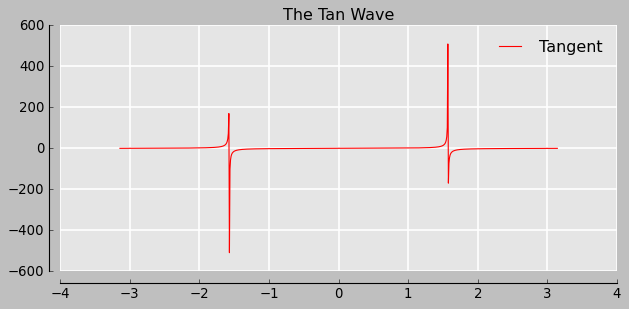

In [83]:
15.	#Plot spines 
#Hiding the top and right spines
# --- the data 
x = np.linspace(-np.pi, np.pi, 800) 
y = np.tan(x) 
# --- the plot 
fig, ax = plt.subplots(figsize=(8, 4)) 
ax.plot(x, y, label='Tangent', color='red') 
# --- background and spines 
ax.set_facecolor('#e5e5e5') 
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none') 
ax.spines['left'].set_position( 
 ('outward',10)) 
ax.spines['bottom'].set_position( 
 ('outward',10)) 
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left') 
# --- tidy up and save 
# do the ax.grid() after setting ticks 
ax.grid(b=True, which='both', 
 color='white', linestyle='-', 
 linewidth=1.5) 
ax.set_axisbelow(True) 
ax.legend(loc='best', frameon=False) 
ax.set_title('The Tan Wave') 
fig.tight_layout(pad=1) 
fig.savefig('filename.png', dpi=125) 


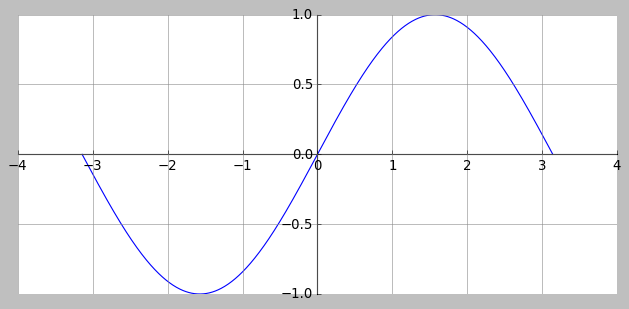

In [84]:
#Spines in the middle 
# --- the data 
x = np.linspace(-np.pi, np.pi, 800) 
y = np.sin(x) 
# --- the plot 
fig, ax = plt.subplots(figsize=(8, 4)) 
# --- the spines 
ax.plot(x, y, label='Sine') 
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none') 
ax.xaxis.set_ticks_position('bottom') 
ax.spines['bottom'].set_position(( 
 'data',0)) 
ax.yaxis.set_ticks_position('left') 
ax.spines['left'].set_position(( 
 'data',0)) 
ax.grid(b=True, which='both', 
 color='#888888', linestyle='-', 
 linewidth=0.5) 
# --- tidy-up and save 
fig.tight_layout(pad=1) 
fig.savefig('filename.png', dpi=125) 


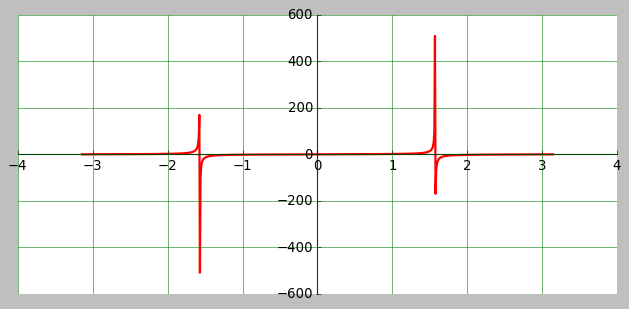

In [95]:
#Spines in the middle 
# --- the data 
x = np.linspace(-np.pi, np.pi, 800) 
y = np.tan(x) 
# --- the plot 
fig, ax = plt.subplots(figsize=(8, 4)) 
# --- the spines 
ax.plot(x, y, label='Tan',linewidth=2,color='red') 
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none') 
ax.xaxis.set_ticks_position('bottom') 
ax.spines['bottom'].set_position(( 
 'data',0)) 
ax.yaxis.set_ticks_position('left') 
ax.spines['left'].set_position(( 
 'data',0)) 
ax.grid(b=True, which='both', 
 color='green', linestyle='-', 
 linewidth=0.5) 
# --- tidy-up and save 
fig.tight_layout(pad=1) 
fig.savefig('filename.png', dpi=125) 


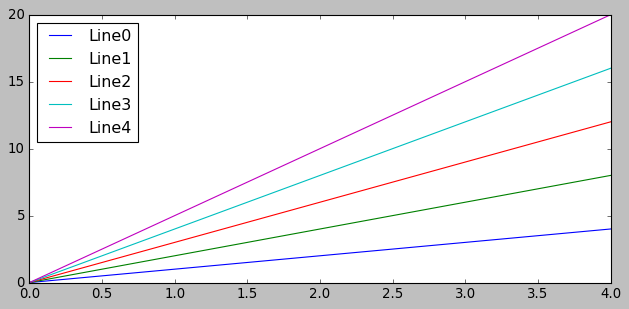

In [96]:
#Legends Legend within the plot Use the 'loc' argument to place the legend
# --- get the empty Figure and Axes classes 
plt.style.use('classic') 
fig, ax = plt.subplots(figsize=(8, 4)) 
# --- plot something 
N = 5 
x = np.arange(N) 
for j in range(5): 
 ax.plot(x, x*(j+1), label='Line'+str(j)) 
# --- place the legend 
ax.legend(loc='upper left') 
# --- save and close 
fig.tight_layout(pad=1) 
fig.savefig('filename.png', dpi=125) 


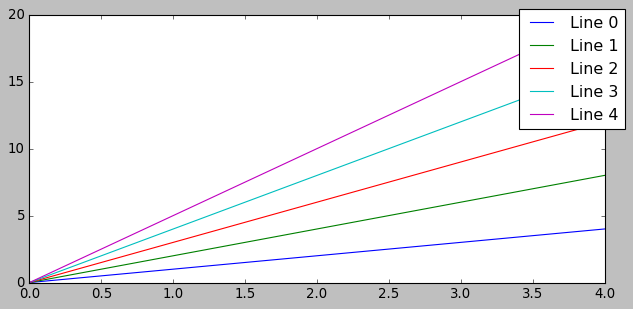

In [97]:
##Legend slightly outside of the plot 
plt.style.use('classic') 
fig, ax = plt.subplots(figsize=(8, 4)) 
N = 5 
x = np.arange(N) 
for j in range(5): 
 ax.plot(x, x*(j+1), 
 label='Line '+str(j)) 
ax.legend(bbox_to_anchor=(1.05, 1.05)) 
fig.tight_layout(pad=1) 
fig.savefig('filename.png', dpi=125) 

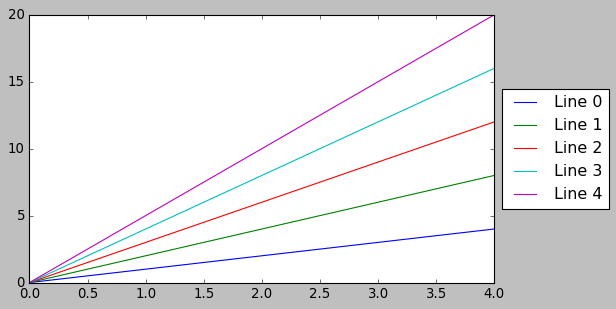

In [98]:
#Legend to the right of the plot 
plt.style.use('classic') 
fig, ax = plt.subplots(figsize=(8, 4)) 
x = np.arange(N) 
for j in range(5): 
 ax.plot(x, x*(j+1), 
 label='Line '+str(j)) 
fig.tight_layout(pad=1) 
box = ax.get_position() # Shrink plot 
ax.set_position([box.x0, box.y0, 
 box.width * 0.8, box.height]) 
ax.legend(bbox_to_anchor=(1, 0.5), 
 loc='center left') # Put legend 
fig.savefig('filename.png', dpi=125) 

In [99]:
#1. Get data – we will fake up a monthly time series 
x = pd.period_range('1980-01-01', periods=450, 
 freq='M').to_timestamp().to_pydatetime() 
y = np.random.randn(len(x)).cumsum()


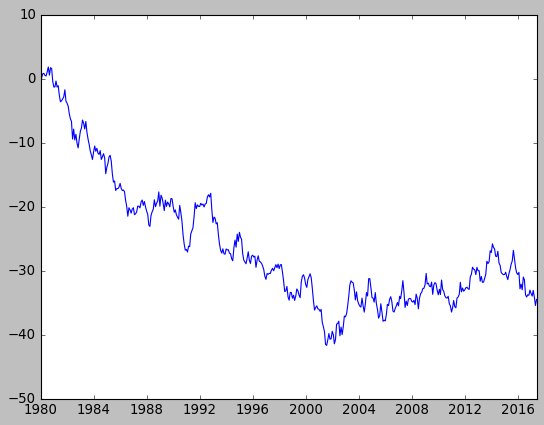

In [100]:
#2. Plot the data 
plt.plot(x, y, label='FDI')
plt.show()

(-1.0123741244270577,
 1.0279400849908642,
 -1.0246160299958926,
 1.0951056578438092)

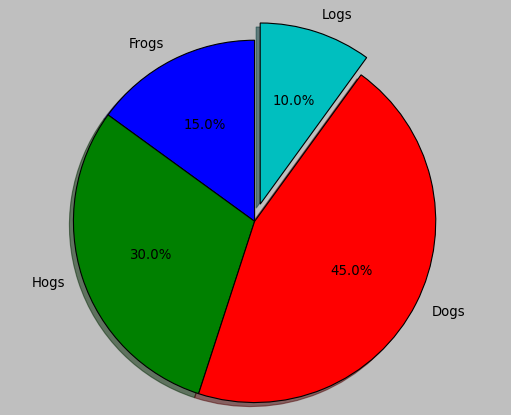

In [105]:
labels='Frogs','Hogs','Dogs','Logs'
sizes=15,30,45,10
colors=['lavendar','blue','lightskyblue','lightcoral']
explode=(0,0,0,0.1)
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
plt.axis('equal')


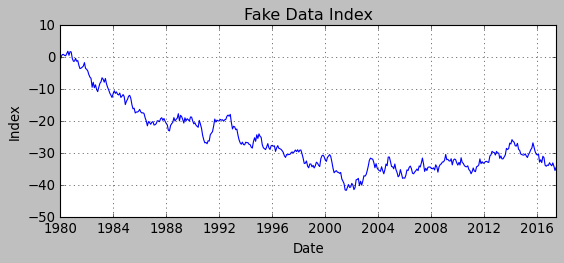

In [106]:
# 3. Add your labels and pretty-up the plot 
plt.gcf().set_size_inches(8, 3) 
plt.title('Fake Data Index') 
plt.xlabel('Date') 
plt.ylabel('Index') 
plt.grid(True) 
plt.plot(x, y)


In [109]:
dataset=pd.read_excel("Descriptive Statistics.xlsx",sheet_name=0)
dataset.head()

,ID,Gender,Birth Date,Education,JobCategory,CurrentSalary,After6Months,SalBegin,Job Time,Prev Exep,Minority
0,3,f,07/26/1929,12,1,21450,16725.0,12000,98,381,0
1,4,f,04/15/1947,8,1,21900,17550.0,13200,98,190,0
2,8,f,1966-06-05 00:00:00,12,1,21900,15825.0,9750,98,0,0
3,9,f,01/23/1946,15,1,27900,20325.0,12750,98,115,0
4,10,f,02/13/1946,12,1,24000,18750.0,13500,98,244,0


(array([210., 158.,  39.,  28.,  22.,   8.,   4.,   4.,   0.,   1.]),
 array([ 15750.,  27675.,  39600.,  51525.,  63450.,  75375.,  87300.,
         99225., 111150., 123075., 135000.]),
 <BarContainer object of 10 artists>)

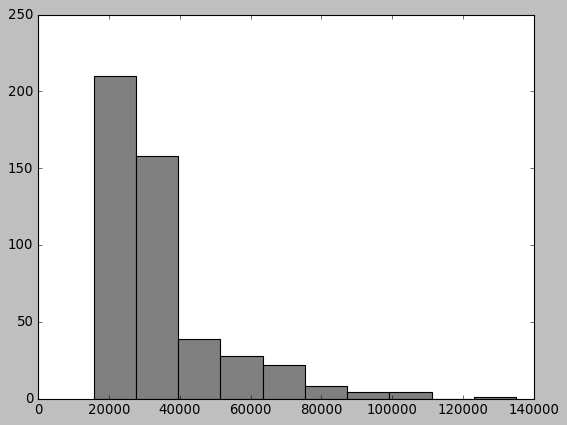

In [112]:
plt.hist(dataset.CurrentSalary,color="grey")

(array([210., 158.,  39.,  28.,  22.,   8.,   4.,   4.,   0.,   1.]),
 array([ 15750.,  27675.,  39600.,  51525.,  63450.,  75375.,  87300.,
         99225., 111150., 123075., 135000.]),
 <BarContainer object of 10 artists>)

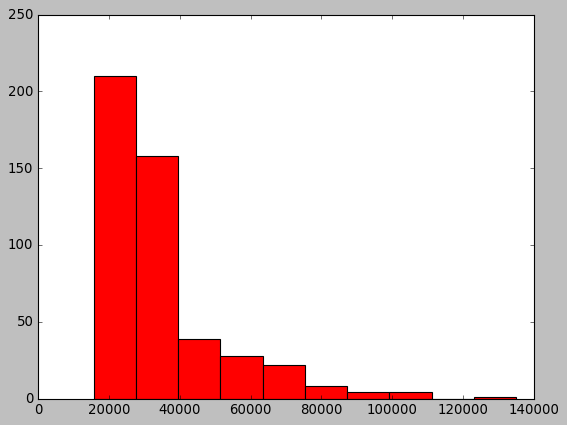

In [113]:
plt.hist(dataset.CurrentSalary,color="red")

In [115]:
boxplot_data=[dataset.CurrentSalary,dataset.After6Months,dataset.SalBegin]
boxplot_data

[0      21450
 1      21900
 2      21900
 3      27900
 4      24000
        ...  
 469    47550
 470    33900
 471    26250
 472    26400
 473    39150
 Name: CurrentSalary, Length: 474, dtype: int64,
 0      16725.0
 1      17550.0
 2      15825.0
 3      20325.0
 4      18750.0
         ...   
 469    40275.0
 470    25200.0
 471    21000.0
 472    21075.0
 473    27450.0
 Name: After6Months, Length: 474, dtype: float64,
 0      12000
 1      13200
 2       9750
 3      12750
 4      13500
        ...  
 469    33000
 470    16500
 471    15750
 472    15750
 473    15750
 Name: SalBegin, Length: 474, dtype: int64]

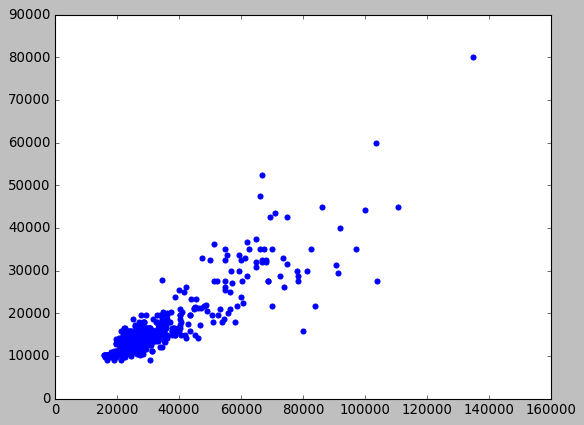

In [116]:
plt.scatter(dataset.CurrentSalary,dataset.SalBegin,color='blue')

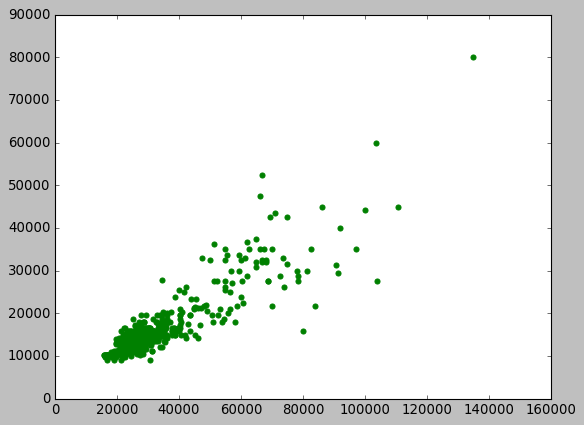

In [117]:
plt.scatter(dataset.CurrentSalary,dataset.SalBegin,color='green')

Text(0.5, 1.0, 'Simple Line Graph')

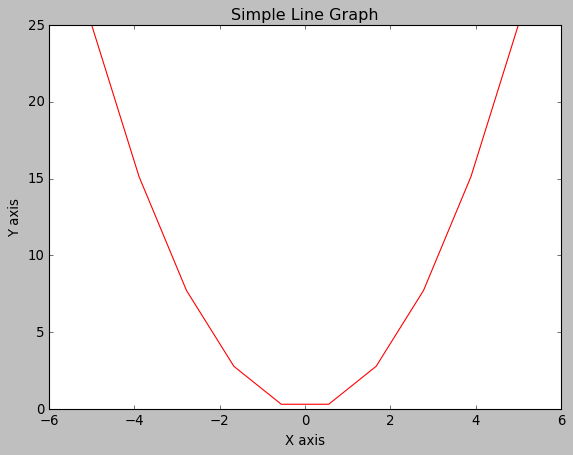

In [118]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,0.8,0.8])
x=np.linspace(-5,5,10)
y=x**2
axes.plot(x,y,'r')
axes.set_xlabel('X axis')
axes.set_ylabel('Y axis')
axes.set_title('Simple Line Graph')


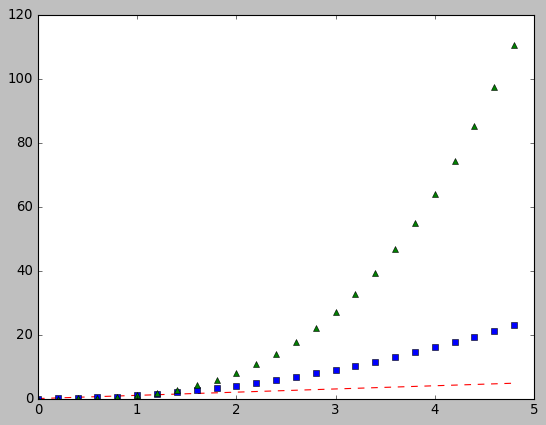

In [119]:
t=np.arange(0.,5.,0.2)

plt.plot(t,t,'r--',t,t**2,'bs',t,t**3,'g^')

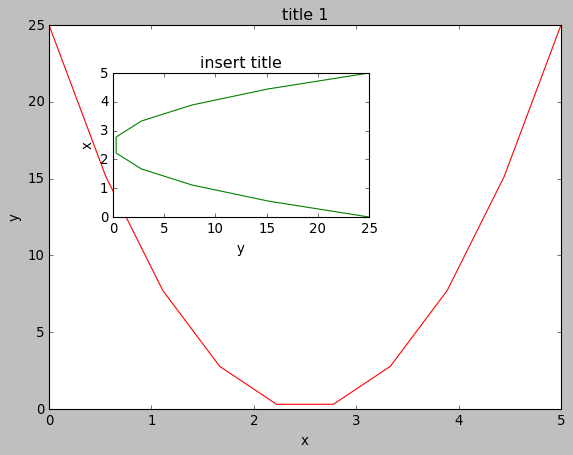

In [120]:
x=np.linspace(0,5,10)

fig=plt.figure()
axes1=fig.add_axes([0.1,0.1,0.8,0.8])
axes2=fig.add_axes([0.2,0.5,0.4,0.3])
axes1.plot(x,y,'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title 1')
axes2.plot(y,x,'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');



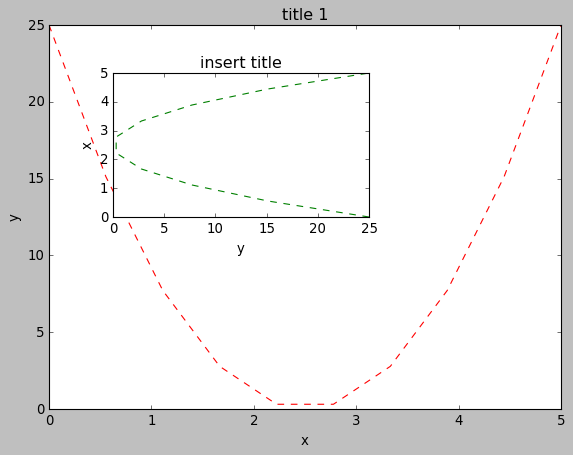

In [121]:
fig=plt.figure()
axes1=fig.add_axes([0.1,0.1,0.8,0.8])
axes2=fig.add_axes([0.2,0.5,0.4,0.3])
axes1.plot(x,y,'r--')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title 1')
axes2.plot(y,x,'g--')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');


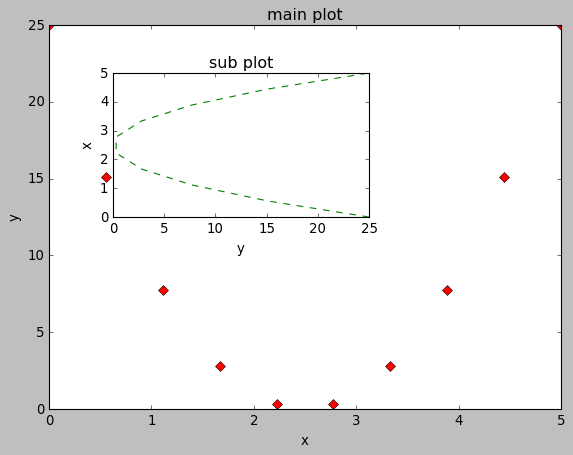

In [128]:
fig=plt.figure()
axes1=fig.add_axes([0.1,0.1,0.8,0.8])
axes2=fig.add_axes([0.2,0.5,0.4,0.3])
axes1.plot(x,y,'rD')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('main plot')
axes2.plot(y,x,'g--')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('sub plot');



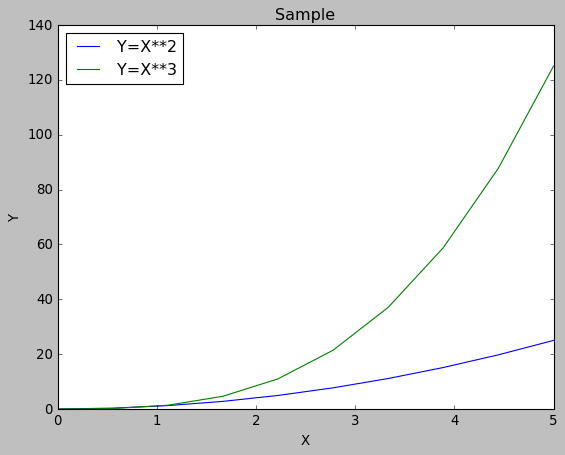

In [124]:
fig, ax=plt.subplots()
ax.plot(x,x**2,label="Y=X**2")
ax.plot(x,x**3,label="Y=X**3")
ax.legend(loc=2);
ax.set_xlabel('X')
ax.set_ylabel('Y')b
ax.set_title('Sample');


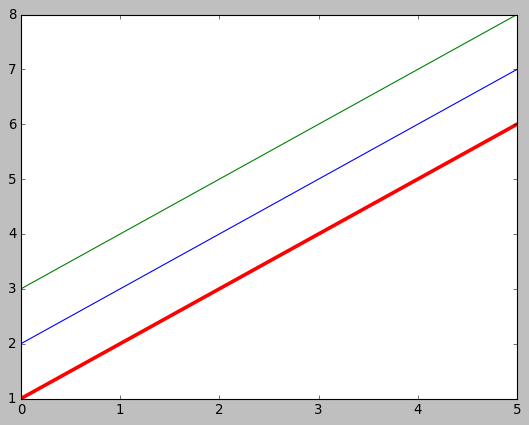

In [129]:
fig, ax=plt.subplots()
ax.plot(x,x+1,color="red",linewidth=3.25)
ax.plot(x,x+2,color="blue")
ax.plot(x,x+3,color="green")


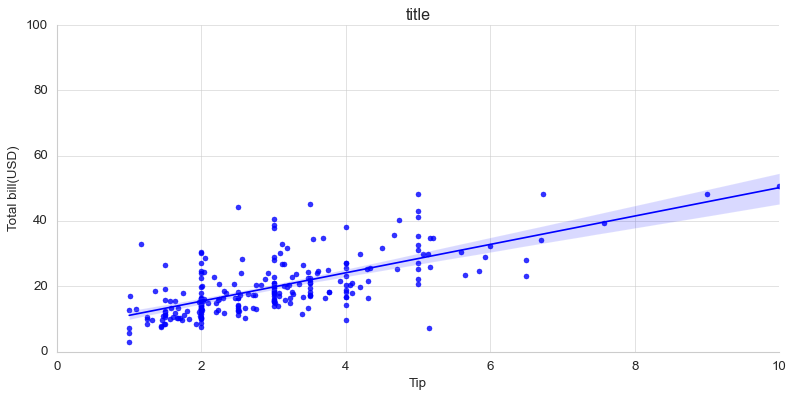

In [130]:
#seaborn commands
import seaborn as sns
tips = sns.load_dataset("tips")
sns.set_style("whitegrid")
g = sns.lmplot(x="tip", y="total_bill", data=tips,
aspect=2)
g = (g.set_axis_labels("Tip","Total bill(USD)").
set(xlim=(0,10),ylim=(0,100)))
plt.title("title")
plt.show(g)


In [133]:
uniform_data = np.random.rand(10, 12)
data = pd.DataFrame({'x':np.arange(1,201),
'y':np.random.normal(0,4,200)})

data


,x,y
0,1,-6.405320
1,2,0.692680
2,3,-2.767913
3,4,1.074459
4,5,-0.305349
...,...,...
195,196,10.750207
196,197,5.163774
197,198,1.154381
198,199,1.743834
